## Exercise: Pandas & NumPy with Student Performance Dataset
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

In [30]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")


In [31]:
df1.columns

Index(['Student_ID', 'Study_Hours', 'Attendance', 'Rest_Hours',
       'Parental_Involvement', 'Access_to_Resources'],
      dtype='object')

In [32]:
df1.rename(columns={"Rest_Hours": "Sleep_Hours", "Study_Hours": "Hours_Studied"}, inplace= True)

In [33]:
df1.head()

,Student_ID,Hours_Studied,Attendance,Sleep_Hours,Parental_Involvement,Access_to_Resources
0,1,23,84,8.0,Low,High
1,2,19,64,9.0,Low,Medium
2,3,24,98,8.0,Medium,Medium
3,4,29,89,9.0,Low,Medium
4,5,19,92,7.0,Medium,Medium


In [34]:
df1.nunique()

Student_ID              6607
Hours_Studied             41
Attendance                41
Sleep_Hours                7
Parental_Involvement       3
Access_to_Resources        3
dtype: int64

In [35]:
df1.dtypes

Student_ID                int64
Hours_Studied             int64
Attendance                int64
Sleep_Hours             float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object

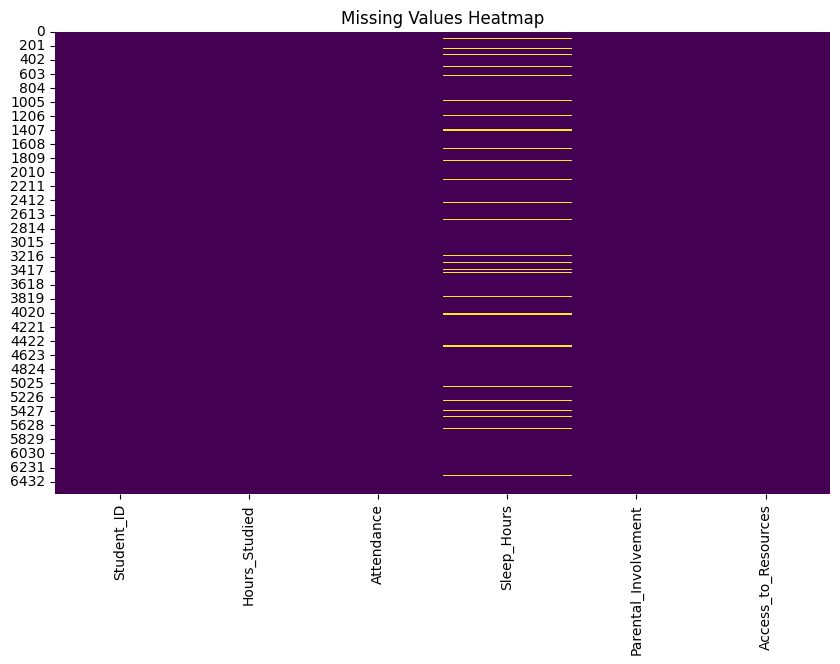

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [37]:
df2.columns

Index(['Unnamed: 0', 'Student_ID', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type'],
      dtype='object')

In [38]:
df2.sort_values(by="Student_ID", inplace=True)
df2.head()

,Unnamed: 0,Student_ID,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
3376,0,1,Available,0.0,Low,Medium,Public
4799,1,2,Available,2.0,Medium,Medium,Public
5019,2,3,Available,2.0,Medium,Medium,Public
5588,3,4,Available,1.0,Medium,Medium,Public
5591,5,6,Available,3.0,Medium,Medium,Public


In [39]:
df2.drop(columns = ["Unnamed: 0"], inplace = True)
# drop this "duplicate" column

In [40]:
df2.nunique()

Student_ID           5616
Internet_Access         2
Tutoring_Sessions       9
Family_Income           3
Teacher_Quality         3
School_Type             2
dtype: int64

In [41]:
df2.dtypes

Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object

In [42]:
df3.rename(columns={"Final_Score": "Exam_Score"}, inplace= True)

In [43]:
df3.head()

,Student_ID,Exam_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,65.0,High School,Close,Male
1,2,59.0,College,Medium,Female
2,3,72.0,Postgraduate,Close,Male
3,4,69.0,High School,Medium,Male
4,5,68.0,College,Close,Female


In [44]:
df3.nunique()

Student_ID                  6607
Exam_Score                    44
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
dtype: int64

In [45]:
df3.dtypes

Student_ID                    int64
Exam_Score                  float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object

## 2.)

I'm using the names from 5.) "Rest_hours" -> "Sleep_hours", "Study_Hours" -> "Hours_Studied" and "Final_Score" -> "Exam_Score". If there were other mess ups, I wouldn't know as I don't have the original data set.


The data types are fine, you could cast variables that seem to be ordinal like Distance_from_Home to be represented by ints (e.g. 0,1,2) but I don't think it's necessary for the given tasks.

The second data set has an unknown column which is just the Student_ID - 1, we can drop that. 
df2 also is missing for around 400 students

In [46]:
# Merging:
submerged_df = pd.merge(df1, df2, on="Student_ID", how="outer")

df = pd.merge(submerged_df, df3, on="Student_ID", how="outer")


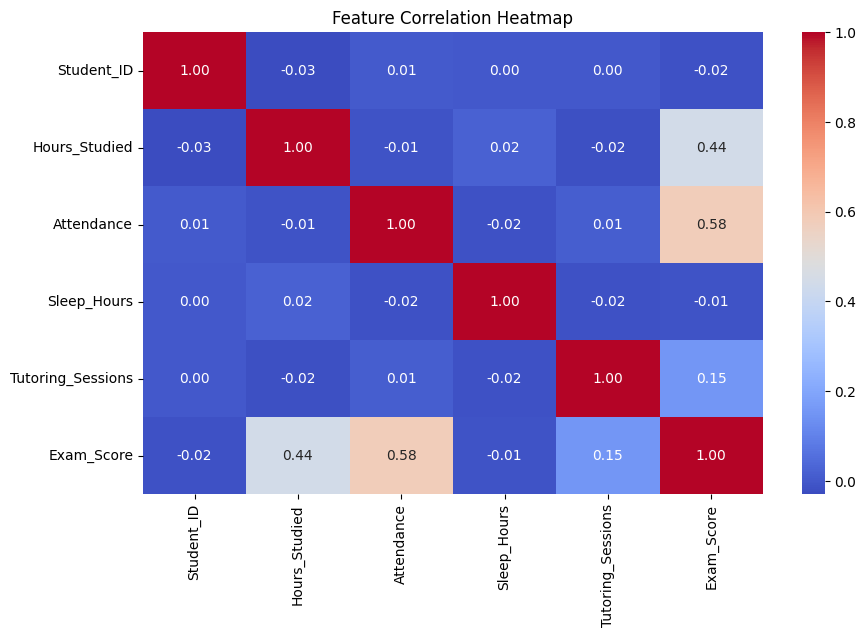

In [47]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Sleep hours which has some missings is not correlated to any other numeric variable
# Final score is at least somewhat correlated with hours_studied and attendance

In [48]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

Student_ID                   0.000000
Hours_Studied                0.000000
Attendance                   0.000000
Sleep_Hours                  4.994703
Parental_Involvement         0.000000
Access_to_Resources          0.000000
Internet_Access             19.252308
Tutoring_Sessions           19.252308
Family_Income               14.999243
Teacher_Quality             15.998184
School_Type                 14.999243
Exam_Score                   4.994703
Parental_Education_Level     1.362192
Distance_from_Home           1.014076
Gender                       0.000000
dtype: float64


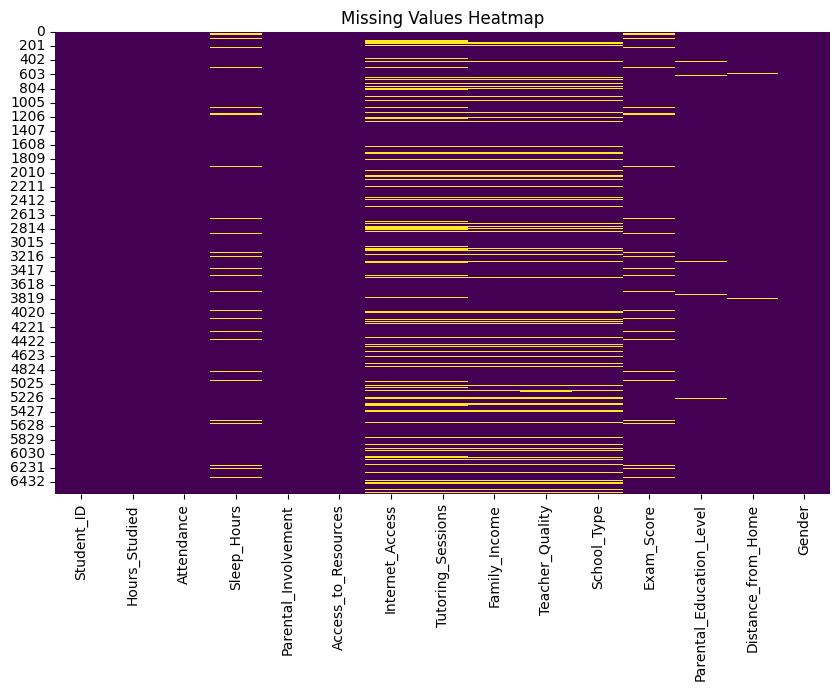

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# the big strips over the middle columns is cause df2 is missing 400 students

In [50]:
# all of them are underneath 30% missing, using the methods suggested in the lecture.
# Median for numeric and mode for categorical

df["Sleep_Hours"] = df["Sleep_Hours"].fillna(df["Sleep_Hours"].median())  # Median imputation
df["Internet_Access"] = df["Internet_Access"].fillna(df["Internet_Access"].mode()[0])
df["Tutoring_Sessions"] = df["Tutoring_Sessions"].fillna(df["Tutoring_Sessions"].mode()[0])
df["Family_Income"] = df["Family_Income"].fillna(df["Family_Income"].mode()[0])
df["School_Type"] = df["School_Type"].fillna(df["School_Type"].mode()[0])
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0])
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0])
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])

# use more advanced method, as final_score is correlated with other variables
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df[['Exam_Score']] = knn_imputer.fit_transform(df[['Exam_Score']])




In [51]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

Student_ID                  0.0
Hours_Studied               0.0
Attendance                  0.0
Sleep_Hours                 0.0
Parental_Involvement        0.0
Access_to_Resources         0.0
Internet_Access             0.0
Tutoring_Sessions           0.0
Family_Income               0.0
Teacher_Quality             0.0
School_Type                 0.0
Exam_Score                  0.0
Parental_Education_Level    0.0
Distance_from_Home          0.0
Gender                      0.0
dtype: float64


### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

### Comments
It doesn't make sense to exlude outliers, as there are none, removing the top and bottom 3% would just exlude some of the kids that sleep 5 hours and some that sleep 11 hours. Both seem like genuine values anyway.
From the histogram below, you can see it kind of is normally distributed, but the mode is very big, so I suspect the Shapiro-Wilks Test to be significant, indicating non normality, as the mode peaks too high and the sample size is quite big.
If you would have wanted us to remove the top and bottom three percent you would do it with ".quantile(0.03)" or ".quantile(0.97)"

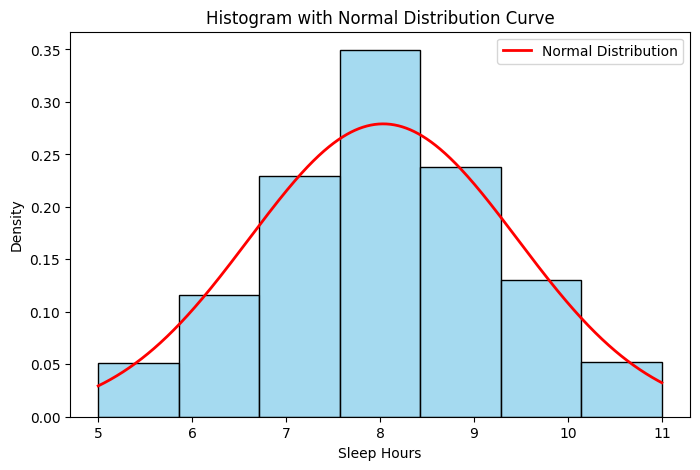

In [52]:
from scipy.stats import norm

# Extract data
data = df['Sleep_Hours']

# Calculate mean and standard deviation
mu, std = np.mean(data), np.std(data)

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=7, kde=False, stat="density", color='skyblue', edgecolor='black')

# Generate values for normal distribution curve
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, norm.pdf(x, mu, std), color='red', linewidth=2, label='Normal Distribution')

plt.title("Histogram with Normal Distribution Curve")
plt.xlabel("Sleep Hours")
plt.ylabel("Density")
plt.legend()
plt.show()

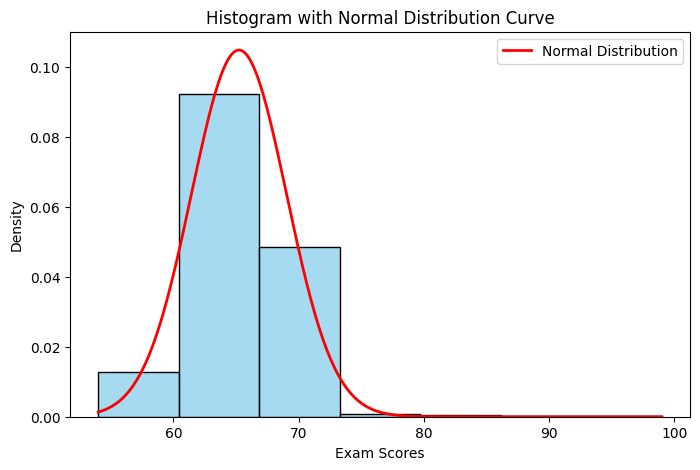

In [53]:
# Extract data
data = df['Exam_Score']

# Calculate mean and standard deviation
mu, std = np.mean(data), np.std(data)

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=7, kde=False, stat="density", color='skyblue', edgecolor='black')

# Generate values for normal distribution curve
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, norm.pdf(x, mu, std), color='red', linewidth=2, label='Normal Distribution')

plt.title("Histogram with Normal Distribution Curve")
plt.xlabel("Exam Scores")
plt.ylabel("Density")
plt.legend()
plt.show()

In [54]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
sleep_shapiro = shapiro(df['Sleep_Hours'])
score_shapiro = shapiro(df['Exam_Score'])

print(f"Sleep_Hours p-value: {sleep_shapiro.pvalue}")
print(f"Exam_Score p-value: {score_shapiro.pvalue}")
# highly significant, also due to big sample size

Sleep_Hours p-value: 3.3196760619854916e-42
Exam_Score p-value: 0.0


/Users/jack/Desktop/Wörheide_Jack/.venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
from scipy.stats import spearmanr

# Spearman correlation
corr, p_value = spearmanr(df["Sleep_Hours"], df["Exam_Score"])
print(f"Spearman Correlation: {corr}, p={p_value}")
print("No significant correlation")

Spearman Correlation: -0.002627625663442202, p=0.8309038837074467
No significant correlation


Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

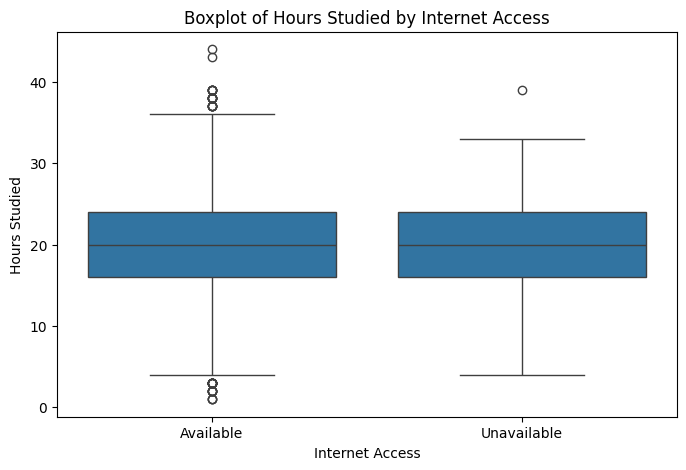

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Internet_Access', y='Hours_Studied', data=df)
plt.title("Boxplot of Hours Studied by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Hours Studied")
plt.show()

In [57]:
studied_with_internet = df[df['Internet_Access'] == "Available"]['Hours_Studied']
studied_without_internet = df[df['Internet_Access'] == "Unavailable"]['Hours_Studied']

def remove_outliers(data):
    Q1 = data.quantile(0.25) 
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # that's the formula a boxplot uses to assess outliers
    upper_bound = Q3 + 1.5 * IQR # that's the formula a boxplot uses to assess outliers
    return data[(data >= lower_bound) & (data <= upper_bound)]

studied_with_internet_clean = remove_outliers(studied_with_internet)
studied_without_internet_clean = remove_outliers(studied_without_internet)


In [58]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(studied_with_internet_clean, studied_without_internet_clean, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")
print("No significant difference in means between the two groups")

t-statistic: 0.5011631458822883, p-value: 0.6165013470835043
No significant difference in means between the two groups


Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

/var/folders/pz/v_8_0l_x7bqbs7gc2cjkr40r0000gp/T/ipykernel_3715/754126500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', data=df, palette='coolwarm')


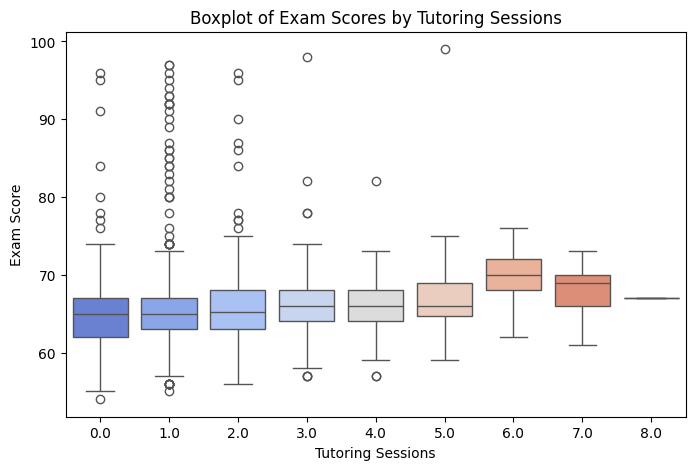

In [59]:
# visual inspection
plt.figure(figsize=(8, 5))
sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', data=df, palette='coolwarm')
plt.title("Boxplot of Exam Scores by Tutoring Sessions")
plt.xlabel("Tutoring Sessions")
plt.ylabel("Exam Score")
plt.show()

In [60]:
from scipy.stats import pearsonr

# Perform Pearson correlation between Tutoring_Sessions and Exam_Score
corr, p_value = pearsonr(df['Tutoring_Sessions'], df['Exam_Score'])

# Output the results
print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")
print("Yes, tutoring does significantly improve the exam_score")

# Spearman yields pretty much the same results (0.13)


Pearson Correlation: 0.12827023374147356
P-value: 1.217658996371814e-25
Yes, tutoring does significantly improve the exam_score
